<a href="https://colab.research.google.com/github/R2D2-like/roomba_hack/blob/tsuji/Opencv_%E8%89%B2%E6%8A%BD%E5%87%BA_%E7%A2%BA%E5%AE%9A%E7%89%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from google.colab import files
uploaded = files.upload()

Saving objects.jpeg to objects.jpeg


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
image = cv2.imread('objects.jpeg') # ファイル読み込み

# HSVでの色抽出
hsvLower = np.array([20, 80, 10])    # 抽出する色の下限(HSV)
hsvUpper = np.array([50, 255, 255])    # 抽出する色の上限(HSV)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV) # 画像をHSVに変換
hsv_mask = cv2.inRange(hsv, hsvLower, hsvUpper)    # HSVからマスクを作成
#result = cv2.bitwise_and(image, image, mask=hsv_mask)

    # 赤色のHSVの値域1
hsv_min = np.array([0,64,0])
hsv_max = np.array([30,255,255])
mask1 = cv2.inRange(hsv, hsv_min, hsv_max)

    # 赤色のHSVの値域2
hsv_min = np.array([150,64,0])
hsv_max = np.array([179,255,255])
mask2 = cv2.inRange(hsv, hsv_min, hsv_max)

# 青色のHSVの値域1
hsv_min = np.array([90, 64, 0])
hsv_max = np.array([150,255,255])

    # 青色領域のマスク（255：赤色、0：赤色以外）    
mask3 = cv2.inRange(hsv, hsv_min, hsv_max)

   # 緑色のHSVの値域1
hsv_min = np.array([30, 64, 0])
hsv_max = np.array([90,255,255])

    # 緑色領域のマスク（255：赤色、0：赤色以外）    
mask4 = cv2.inRange(hsv, hsv_min, hsv_max)


mask = hsv_mask + mask1 + mask2 + mask3 + mask4
result = cv2.bitwise_and(image, image, mask=mask)

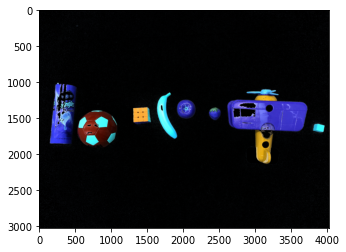

In [ ]:
plt.imshow(result)

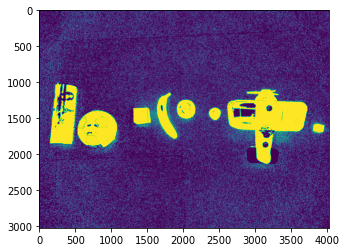

In [ ]:
plt.imshow(mask)

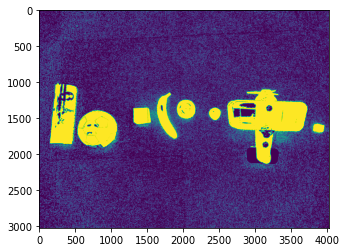

In [ ]:
#mask_base = np.zeros_like(mask)
mask_result = np.where(mask,255,0)
plt.imshow(mask_result)